<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP-2024-2025/blob/main/Lecture_5_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5. Кластеризация


## 5.1. Основные показатели, используемые для оценки эффективности алгоритмов кластеризации

Эффективность алгоритмов кластеризации оценивается на основе нескольких ключевых показателей, которые позволяют определить качество разбиения данных на группы. К основным метрикам, применяемым в данной области, относятся внутрикластерная дисперсия (WCSS), межкластерная дисперсия (BCSS), силуэтный коэффициент, индекс Дэвиса-Болдина, индекс Рэнда и скорректированный индекс Рэнда, а также гомогенность и полнота. Эти показатели обеспечивают всестороннюю оценку кластеризации, позволяя исследователям сравнивать и выбирать наиболее подходящие алгоритмы для конкретных задач.

**Внутрикластерная дисперсия (Within-Cluster Sum of Squares, WCSS)**

Внутрикластерная дисперсия измеряет сумму квадратов расстояний от каждого объекта до центра своего кластера. Формально, данный показатель определяется как:

$$ WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)^2 $$

где $C_i $ обозначает кластер, $\mu_i$ — центр кластера, а $x $ — объект данных. Цель заключается в минимизации значения WCSS, что свидетельствует о плотной группировке объектов внутри кластеров.



### Пример
Предположим, у нас есть три кластера с центрами в координатах (1,1), (5,5) и (9,9). Объекты в этих кластерах имеют следующие координаты:

- Кластер 1: (1,2), (2,1), (1,1)
- Кластер 2: (5,6), (6,5), (5,5)
- Кластер 3: (9,8), (8,9), (9,9)

Вычислим внутрикластерную дисперсию (WCSS):

$$ WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} (x - \mu_i)^2 $$

Для кластера 1:
- Расстояние от (1,2) до (1,1): \((1-1)^2 + (2-1)^2 = 0 + 1 = 1\)
- Расстояние от (2,1) до (1,1): \((2-1)^2 + (1-1)^2 = 1 + 0 = 1\)
- Расстояние от (1,1) до (1,1): \((1-1)^2 + (1-1)^2 = 0 + 0 = 0\)

Для кластера 2:
- Расстояние от (5,6) до (5,5): \((5-5)^2 + (6-5)^2 = 0 + 1 = 1\)
- Расстояние от (6,5) до (5,5): \((6-5)^2 + (5-5)^2 = 1 + 0 = 1\)
- Расстояние от (5,5) до (5,5): \((5-5)^2 + (5-5)^2 = 0 + 0 = 0\)

Для кластера 3:
- Расстояние от (9,8) до (9,9): \((9-9)^2 + (8-9)^2 = 0 + 1 = 1\)
- Расстояние от (8,9) до (9,9): \((8-9)^2 + (9-9)^2 = 1 + 0 = 1\)
- Расстояние от (9,9) до (9,9): \((9-9)^2 + (9-9)^2 = 0 + 0 = 0\)

Итак, \( WCSS = 1 + 1 + 0 + 1 + 1 + 0 + 1 + 1 + 0 = 6 \).



**Межкластерная дисперсия (Between-Cluster Sum of Squares, BCSS)**

Межкластерная дисперсия характеризует сумму квадратов расстояний между центрами кластеров. Этот показатель рассчитывается по формуле:

$$ BCSS = \sum_{i=1}^{k} n_i (\mu_i - \mu)^2 $$

где $n_i $ — количество объектов в кластере, $ \mu_i $ — центр кластера, а $\mu $ — общий центр всех данных. Оптимизация алгоритма направлена на максимизацию значения BCSS, что указывает на значительные различия между кластерами.




### Пример
Центры кластеров: (1,1), (5,5), (9,9). Общий центр всех данных (среднее арифметическое всех точек): (5,5).

$$ BCSS = \sum_{i=1}^{k} n_i (\mu_i - \mu)^2 $$

- Для кластера 1: $ n_1 = 3 $, $ \mu_1 = (1,1) $, $ (\mu_1 - \mu)^2 = ((1-5)^2 + (1-5)^2) = 16 + 16 = 32 $
- Для кластера 2: $ n_2 = 3 $, $ \mu_2 = (5,5) $, $ (\mu_2 - \mu)^2 = ((5-5)^2 + (5-5)^2) = 0 + 0 = 0 $
- Для кластера 3: $ n_3 = 3 $, $ \mu_3 = (9,9) $, $ (\mu_3 - \mu)^2 = ((9-5)^2 + (9-5)^2) = 16 + 16 = 32 $

Итак, $ BCSS = 3 \cdot 32 + 3 \cdot 0 + 3 \cdot 32 = 96 + 0 + 96 = 192 $.




**Силуэтный коэффициент (Silhouette Score)**

Силуэтный коэффициент оценивает, насколько объекты внутри кластера схожи друг с другом и отличаются от объектов других кластеров. Формула данного показателя выглядит следующим образом:

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

где $ a(i) $ — среднее расстояние до других объектов в том же кластере, а $ b(i) $ — среднее расстояние до объектов в ближайшем другом кластере. Значения силуэтного коэффициента варьируются от -1 до 1, где 1 указывает на идеальную кластеризацию, а -1 — на неудовлетворительную.




### Пример
Рассмотрим объект (1,2) в кластере 1. Пусть его среднее расстояние до других объектов в своем кластере (1,1) и (2,1) составляет 1, а среднее расстояние до объектов ближайшего другого кластера 2 составляет 6.

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

$$ s(1,2) = \frac{6 - 1}{\max(1, 6)} = \frac{5}{6} \approx 0.83 $$



**Индекс Дэвиса-Болдина (Davis-Bouldin Index)**

Индекс Дэвиса-Болдина является средним значением отношения внутрикластерного расстояния к межкластерному расстоянию для каждого кластера. Он вычисляется по формуле:

$$DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right) $$

где $ \sigma_i$ — среднее расстояние объектов до центра кластера, $ d(\mu_i, \mu_j) $ — расстояние между центрами кластеров $i $ и $ j$. Меньшие значения индекса Дэвиса-Болдина указывают на лучшую кластеризацию.



### Пример
Рассмотрим три кластера с внутрикластерными средними расстояниями:
- Кластер 1: $\sigma_1 = 1$
- Кластер 2: $\sigma_2 = 1$
- Кластер 3: $\sigma_3 = 1$

Расстояния между центрами:
- $d(\mu_1, \mu_2) = 5.66$
- $d(\mu_1, \mu_3) = 11.31$
- $d(\mu_2, \mu_3) = 5.66$

$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right) $$

Для кластера 1:
$$ \max \left( \frac{\sigma_1 + \sigma_2}{d(\mu_1, \mu_2)}, \frac{\sigma_1 + \sigma_3}{d(\mu_1, \mu_3)} \right) = \max \left( \frac{1+1}{5.66}, \frac{1+1}{11.31} \right) = \frac{2}{5.66} \approx 0.35 $$

Для кластера 2:
$$ \max \left( \frac{\sigma_2 + \sigma_1}{d(\mu_2, \mu_1)}, \frac{\sigma_2 + \sigma_3}{d(\mu_2, \mu_3)} \right) = \max \left( \frac{1+1}{5.66}, \frac{1+1}{5.66} \right) = \frac{2}{5.66} \approx 0.35 $$

Для кластера 3:
$$ \max \left( \frac{\sigma_3 + \sigma_1}{d(\mu_3, \mu_1)}, \frac{\sigma_3 + \sigma_2}{d(\mu_3, \mu_2)} \right) = \max \left( \frac{1+1}{11.31}, \frac{1+1}{5.66} \right) = \frac{2}{5.66} \approx 0.35 $$

Итак, $ DB = \frac{1}{3} (0.35 + 0.35 + 0.35) = 0.35 $.




**Индекс Рэнда (Rand Index) и скорректированный индекс Рэнда (Adjusted Rand Index, ARI)**

Индекс Рэнда и его скорректированная версия оценивают сходство между предсказанными кластерами и истинной кластеризацией. Формула индекса Рэнда выглядит так:

$$RI = \frac{TP + TN}{TP + FP + FN + TN} $$

где TP, TN, FP, FN — числа истинных и ложных совпадений. Скорректированный индекс Рэнда (ARI) корректирует случайные совпадения, и его значения могут варьироваться от -1 до 1, где 1 означает идеальную кластеризацию.



### Пример
Предположим, у нас есть истинная кластеризация и предсказанная кластеризация для 10 объектов.

- Истинная кластеризация: (1,1,1,1,2,2,2,2,3,3)
- Предсказанная кластеризация: (1,1,1,2,2,2,3,3,3,3)

Посчитаем количество TP, TN, FP, FN:

- TP (True Positive): количество пар объектов, которые находятся в одном кластере и в истинной, и в предсказанной кластеризации (6).
- TN (True Negative): количество пар объектов, которые находятся в разных кластерах и в истинной, и в предсказанной кластеризации (12).
- FP (False Positive): количество пар объектов, которые находятся в одном кластере в предсказанной, но в разных в истинной кластеризации (4).
- FN (False Negative): количество пар объектов, которые находятся в разных кластерах в предсказанной, но в одном в истинной кластеризации (4).

$$ RI = \frac{TP + TN}{TP + FP + FN + TN} = \frac{6 + 12}{6 + 4 + 4 + 12} = \frac{18}{26} \approx 0.69 $$

Скорректированный индекс Рэнда (ARI) может быть посчитан с использованием более сложной формулы, но для примера скажем, что его значение получилось 0.55.


**Гомогенность (Homogeneity) и полнота (Completeness)**

Гомогенность (Homogeneity) и полнота (Completeness) — это показатели, которые оценивают соответствие кластеров истинным классам. Гомогенность означает, что все элементы кластера принадлежат одному классу, а полнота указывает, что все элементы одного класса отнесены к одному кластеру.

Формально, гомогенность $ h $ и полнота $ c $ можно определить следующим образом:

1. **Гомогенность (Homogeneity)**:
$$ h = 1 - \frac{H(C|K)}{H(C)} $$
где:
- $ H(C|K) $ — условная энтропия классов $ C $ при заданных кластерах $ K $.
- $ H(C) $ — энтропия классов $ C $.

2. **Полнота (Completeness)**:
$$ c = 1 - \frac{H(K|C)}{H(K)} $$
где:
- $ H(K|C) $ — условная энтропия кластеров $ K $ при заданных классах $ C $.
- $ H(K) $ — энтропия кластеров $ K $.

Индекс V-Measure представляет собой гармоническое среднее гомогенности и полноты, что позволяет учитывать оба аспекта одновременно. Он рассчитывается как:

$$ V = 2 \cdot \frac{h \cdot c}{h + c} $$

Таким образом, V-Measure является сбалансированным показателем, который объединяет как гомогенность, так и полноту, позволяя более всесторонне оценить качество кластеризации.




### Пример

Предположим, что у нас есть набор данных с элементами, принадлежащими трём истинным классам $ C = \{C_1, C_2, C_3\} $, и что алгоритм кластеризации распределил эти элементы по трём кластерам $ K = \{K_1, K_2, K_3\} $.

### Матрица смежности

Для наглядности представим матрицу смежности (матрицу сопряженности), которая показывает распределение элементов по классам и кластерам:

|        | $ K_1 $ | $ K_2 $ | $ K_3 $ |
|--------|----------|----------|----------|
| $ C_1 $ |    10    |     0    |     0    |
| $ C_2 $ |     0    |    15    |     0    |
| $ C_3 $ |     5    |     5    |    10    |

### 1. Вычисление энтропии классов $ H(C) $:

$$
H(C) = - \left( \frac{10}{30} \log \frac{10}{30} + \frac{15}{30} \log \frac{15}{30} + \frac{5}{30} \log \frac{5}{30} \right)
$$

$$
H(C) = - \left( \frac{1}{3} \log \frac{1}{3} + \frac{1}{2} \log \frac{1}{2} + \frac{1}{6} \log \frac{1}{6} \right)
$$

$$
H(C) = - \left( \frac{1}{3} \cdot (-1.099) + \frac{1}{2} \cdot (-0.693) + \frac{1}{6} \cdot (-1.792) \right)
$$

$$
H(C) \approx - \left( -0.366 + -0.347 + -0.299 \right) = 1.012
$$

### 2. Вычисление энтропии кластеров $ H(K) $:

$$
H(K) = - \left( \frac{15}{30} \log \frac{15}{30} + \frac{10}{30} \log \frac{10}{30} + \frac{5}{30} \log \frac{5}{30} \right)
$$

$$
H(K) = - \left( \frac{1}{2} \log \frac{1}{2} + \frac{1}{3} \log \frac{1}{3} + \frac{1}{6} \log \frac{1}{6} \right)
$$

$$
H(K) = - \left( 0.5 \cdot (-0.693) + 0.333 \cdot (-1.099) + 0.167 \cdot (-1.792) \right)
$$

$$
H(K) \approx - \left( -0.347 + -0.366 + -0.299 \right) = 1.012
$$

### 3. Вычисление условной энтропии классов $ H(C|K) $:

$$
H(C|K) = - \left( \frac{15}{30} \left( \frac{10}{15} \log \frac{10}{15} + \frac{5}{15} \log \frac{5}{15} \right) + \frac{10}{30} \left( \frac{10}{10} \log \frac{10}{10} \right) + \frac{5}{30} \left( \frac{5}{5} \log \frac{5}{5} \right) \right)
$$

$$
H(C|K) = - \left( \frac{1}{2} \left( \frac{2}{3} \log \frac{2}{3} + \frac{1}{3} \log \frac{1}{3} \right) + \frac{1}{3} \cdot 0 + \frac{1}{6} \cdot 0 \right)
$$

$$
H(C|K) = - \left( \frac{1}{2} \left( -0.176 + -0.477 \right) \right)
$$

$$
H(C|K) \approx - \left( \frac{1}{2} \left( -0.117 + -0.159 \right) \right)
$$

$$
H(C|K) \approx - \left( \frac{1}{2} \cdot -0.276 \right) = 0.138
$$

### 4. Вычисление условной энтропии кластеров $ H(K|C) $:

$$
H(K|C) = - \left( \frac{10}{30} \left( \frac{10}{10} \log \frac{10}{10} \right) + \frac{15}{30} \left( \frac{15}{15} \log \frac{15}{15} \right) + \frac{5}{30} \left( \frac{5}{10} \log \frac{5}{10} + \frac{5}{10} \log \frac{5}{10} \right) \right)
$$

$$
H(K|C) = - \left( \frac{1}{3} \cdot 0 + \frac{1}{2} \cdot 0 + \frac{1}{6} \left( 2 \cdot 0.5 \cdot (-0.301) \right) \right)
$$

$$
H(K|C) = - \left( 0 + 0 + \frac{1}{6} \left( -0.602 \right) \right) = 0.100
$$

### 5. Вычисление гомогенности и полноты:

#### Гомогенность (Homogeneity):

$$
h = 1 - \frac{H(C|K)}{H(C)} = 1 - \frac{0.138}{1.012} \approx 0.864
$$

#### Полнота (Completeness):

$$
c = 1 - \frac{H(K|C)}{H(K)} = 1 - \frac{0.100}{1.012} \approx 0.901
$$

### 6. Вычисление индекса V-Measure:

$$
V = 2 \cdot \frac{h \cdot c}{h + c} = 2 \cdot \frac{0.864 \cdot 0.901}{0.864 + 0.901} \approx 2 \cdot \frac{0.778}{1.765} \approx 0.881
$$

### Итоги:

- **Гомогенность** $ h \approx 0.864 $
- **Полнота** $ c \approx 0.901 $
- **Индекс V-Measure** $ V \approx 0.881 $

Этот пример показывает, как с помощью формул можно оценить качество кластеризации данных, используя показатели гомогенности и полноты, а также их гармоническое среднее — индекс V-Measure.



**Методы сравнения алгоритмов**

Сравнение алгоритмов кластеризации проводится с использованием визуализации кластеров, кросс-валидации и сравнения с эталонными данными. Визуализация с помощью графиков, таких как scatter plot, и методов понижения размерности, таких как PCA или t-SNE, помогает визуально оценить качество кластеризации. Кросс-валидация позволяет оценить стабильность алгоритма на разных подмножествах данных. Сравнение с эталонными данными, если они доступны, дает возможность объективной оценки результатов.

Эти показатели и методы анализа обеспечивают всестороннюю оценку эффективности алгоритмов кластеризации, помогая исследователям выбрать наиболее подходящие методы для решения конкретных задач.


## 5.2. Основные алгоритмы кластеризации

Кластеризация представляет собой важную задачу в области анализа данных и машинного обучения, целью которой является группировка объектов в такие кластеры, что объекты внутри одного кластера максимально похожи друг на друга, а объекты из разных кластеров — максимально различны. В данной главе рассмотрены основные алгоритмы кластеризации, их преимущества и недостатки, а также современные модификации, адаптирующие эти алгоритмы к специфике данных социальных сетей.

### Зачем нужны алгоритмы кластеризации в обработке естественного языка (NLP)

#### Что такое кластеризация в NLP?

Кластеризация текстов в NLP — это процесс группировки текстовых данных на основе их схожести. Целью является создание кластеров, внутри которых тексты более похожи друг на друга, чем на тексты из других кластеров. Это помогает структурировать и организовать текстовую информацию, делая её более доступной для анализа и понимания.


#### Зачем нужны алгоритмы кластеризации в NLP?

1. **Группировка текстов по схожести**: Кластеризация позволяет группировать тексты, которые похожи друг на друга по содержанию. Это особенно полезно для обзоров товаров, где можно выделить кластеры отзывов на основе схожести мнений.

2. **Тематическое моделирование**: Алгоритмы кластеризации, такие как Latent Dirichlet Allocation (LDA), помогают выделять темы из коллекции текстов. Например, анализ новостных статей с использованием LDA может выявить темы, такие как политика, экономика, спорт и т.д.

3. **Категоризация документов**: В поисковых системах кластеризация помогает категоризировать документы, упрощая процесс поиска для пользователей. Например, выделение категорий новостных статей (спорт, наука, культура и т.д.) помогает пользователям быстро находить интересующую информацию.

4. **Анализ социальных медиа и мониторинг мнений**: Кластеризация позволяет анализировать множество текстовых данных из социальных медиа для выявления трендов и настроений. Например, можно выделить группы пользователей по отзывам о продукте или настроению к политическим событиям.

5. **Поиск дубликатов и аномалий**: Кластеризация помогает выявлять дубликаты текстов или аномалии в больших наборах данных. Это полезно при обработке больших объёмов информации, например, в системах мониторинга новостей или анализа текстов социальных сетей.







### Лекция: Зачем нужны алгоритмы кластеризации в обработке естественного языка (NLP)

#### Введение в обработку естественного языка (NLP)

Обработка естественного языка (NLP) является важной областью искусственного интеллекта, которая занимается анализом и обработкой текстовых данных с целью извлечения смысла и информации.

#### Зачем нужны алгоритмы кластеризации в NLP?

1. **Группировка текстов по схожести**: Кластеризация позволяет группировать тексты, которые похожи друг на друга по содержанию. Это особенно полезно для обзоров товаров, где можно выделить кластеры отзывов на основе схожести мнений.

2. **Тематическое моделирование**: Алгоритмы кластеризации, такие как Latent Dirichlet Allocation (LDA), помогают выделять темы из коллекции текстов. Например, анализ новостных статей с использованием LDA может выявить темы, такие как политика, экономика, спорт и т.д.

3. **Категоризация документов**: В поисковых системах кластеризация помогает категоризировать документы, упрощая процесс поиска для пользователей. Например, выделение категорий новостных статей (спорт, наука, культура и т.д.) помогает пользователям быстро находить интересующую информацию.

4. **Анализ социальных медиа и мониторинг мнений**: Кластеризация позволяет анализировать множество текстовых данных из социальных медиа для выявления трендов и настроений. Например, можно выделить группы пользователей по отзывам о продукте или настроению к политическим событиям.

5. **Поиск дубликатов и аномалий**: Кластеризация помогает выявлять дубликаты текстов или аномалии в больших наборах данных. Это полезно при обработке больших объёмов информации, например, в системах мониторинга новостей или анализа текстов социальных сетей.

#### Примеры алгоритмов кластеризации в NLP

##### Пример 1: Группировка отзывов на товары

Предположим, у нас есть коллекция отзывов на продукты и мы хотим выделить основные типы отзывов, чтобы лучше понять мнение потребителей о продукте. Мы можем использовать алгоритм кластеризации, например, k-means, для разделения отзывов на группы на основе схожести их содержания.

Пример текста отзыва:

```
Отзыв 1: "Этот смартфон просто отличный! Камера снимает потрясающие фотографии, и аккумулятор держит долго."
Отзыв 2: "Я довольна покупкой этого смартфона, особенно качество экрана и скорость работы."
Отзыв 3: "Не понравилась батарея, быстро разряжается, а так в целом устройство неплохое."
Отзыв 4: "Мне нравится, как он справляется с играми, очень быстрый процессор!"
```

После применения кластеризации мы можем получить, например, два основных кластера:
- Кластер 1 (положительные отзывы о камере, аккумуляторе и производительности):
  - Отзыв 1: "Этот смартфон просто отличный! Камера снимает потрясающие фотографии, и аккумулятор держит долго."
  - Отзыв 2: "Я довольна покупкой этого смартфона, особенно качество экрана и скорость работы."

- Кластер 2 (отзывы с проблемой батареи и упоминанием производительности):
  - Отзыв 3: "Не понравилась батарея, быстро разряжается, а так в целом устройство неплохое."
  - Отзыв 4: "Мне нравится, как он справляется с играми, очень быстрый процессор!"

Это позволяет быстро выделить основные аспекты, которые важны для пользователей при выборе смартфона, и понять, какие аспекты нуждаются в дополнительных улучшениях.


Таким образом, алгоритмы кластеризации играют важную роль в обработке и анализе текстовых данных в NLP, делая информацию более структурированной и понятной для последующего анализа и применения. Понимание и использование этих алгоритмов позволяет автоматизировать и оптимизировать процессы работы с текстовыми данными, что важно в современных системах информационного поиска и аналитики.

## Алгоритм k средних (k-means)

K-Means — это популярный алгоритм кластеризации, который используется для разделения набора данных на $ k$ кластеров, где каждый кластер состоит из близко расположенных друг к другу точек. Он основан на минимизации внутрикластерного расстояния, которое обычно измеряется как сумма квадратов расстояний от каждой точки до центра ее кластера.

### Основные шаги алгоритма K-Means:

1. **Инициализация**: Выбираются $ k$ начальных центроидов (центров кластеров). Это можно сделать случайным образом или с использованием различных методов, таких как K-Means++.
2. **Назначение кластеров**: Каждая точка данных назначается к кластеру, центроид которого находится к ней ближе всего. Это делается путем вычисления евклидова расстояния от точки до всех центроидов.
3. **Обновление центроидов**: Новые центроиды рассчитываются как среднее арифметическое всех точек, принадлежащих кластерам.
4. **Повторение**: Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут изменяться или не будет достигнуто заданное количество итераций.

### Математическое описание

#### Евклидово расстояние
Евклидово расстояние между двумя точками $ x = (x_1, x_2, ..., x_n)$ и $ y = (y_1, y_2, ..., y_n)$ в $ n$-мерном пространстве вычисляется как:
$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

#### Обновление центроидов
Если $ C_j$ — это множество точек, принадлежащих кластеру $ j$, то новый центроид $ \mu_j$ для этого кластера вычисляется как:
$$\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x $$

#### Функция стоимости (инерция)
Цель алгоритма K-Means — минимизировать внутрикластерную сумму квадратов расстояний, также известную как инерция:
$$J = \sum_{j=1}^{k} \sum_{x \in C_j} \|x - \mu_j\|^2 $$

### Пример

Рассмотрим простой пример с двумя кластерами $ k = 2$ и набором данных, состоящим из 6 точек на плоскости $(x, y)$:
$$
\{(2, 3), (3, 3), (6, 8), (8, 8), (2, 1), (5, 2)\}
$$

#### Инициализация

Пусть начальные центроиды будут выбраны случайным образом:
$$
\mu_1 = (2, 3), \quad \mu_2 = (6, 8)
$$

#### Шаг 1: Назначение кластеров

Вычисляем расстояние от каждой точки до центроидов и назначаем точки кластерам:

- $ (2, 3)$: $ d((2, 3), (2, 3)) = 0$, $ d((2, 3), (6, 8)) = \sqrt{(2-6)^2 + (3-8)^2} = \sqrt{16 + 25} = \sqrt{41} \approx 6.4$ → Кластер 1
- $ (3, 3)$: $ d((3, 3), (2, 3)) = 1$, $ d((3, 3), (6, 8)) = \sqrt{(3-6)^2 + (3-8)^2} = \sqrt{9 + 25} = \sqrt{34} \approx 5.8$ → Кластер 1
- $ (6, 8)$: $ d((6, 8), (2, 3)) = \sqrt{(6-2)^2 + (8-3)^2} = \sqrt{16 + 25} = \sqrt{41} \approx 6.4$, $ d((6, 8), (6, 8)) = 0$ → Кластер 2
- $ (8, 8)$: $ d((8, 8), (2, 3)) = \sqrt{(8-2)^2 + (8-3)^2} = \sqrt{36 + 25} = \sqrt{61} \approx 7.8$, $ d((8, 8), (6, 8)) = \sqrt{(8-6)^2 + (8-8)^2} = \sqrt{4} = 2$ → Кластер 2
- $ (2, 1)$: $ d((2, 1), (2, 3)) = \sqrt{(2-2)^2 + (1-3)^2} = \sqrt{4} = 2$, $ d((2, 1), (6, 8)) = \sqrt{(2-6)^2 + (1-8)^2} = \sqrt{16 + 49} = \sqrt{65} \approx 8.1$ → Кластер 1
- $ (5, 2)$: $ d((5, 2), (2, 3)) = \sqrt{(5-2)^2 + (2-3)^2} = \sqrt{9 + 1} = \sqrt{10} \approx 3.2$, $ d((5, 2), (6, 8)) = \sqrt{(5-6)^2 + (2-8)^2} = \sqrt{1 + 36} = \sqrt{37} \approx 6.1$ → Кластер 1

Итак, кластеры:
- Кластер 1: $ (2, 3), (3, 3), (2, 1), (5, 2)$
- Кластер 2: $ (6, 8), (8, 8)$

#### Шаг 2: Обновление центроидов

Новые центроиды вычисляются как средние значения точек в кластерах:
- $ \mu_1 = \left( \frac{2 + 3 + 2 + 5}{4}, \frac{3 + 3 + 1 + 2}{4} \right) = (3, 2.25)$
- $ \mu_2 = \left( \frac{6 + 8}{2}, \frac{8 + 8}{2} \right) = (7, 8)$

#### Повторение шагов 1 и 2

Процесс повторяется с новыми центроидами, пока центроиды не перестанут изменяться или не будет достигнуто максимальное количество итераций.

Таким образом, алгоритм K-Means — это итеративный процесс, который минимизирует внутрикластерное расстояние, обеспечивая эффективную кластеризацию данных. Важно помнить, что результат может зависеть от начальной инициализации центроидов, поэтому часто используется несколько запусков алгоритма с разными начальными условиями, чтобы найти оптимальное решение.



Приведем пример реализации алгоритма K-Means на языке Python. Будем использовать библиотеки NumPy для работы с массивами и Matplotlib для визуализации результатов.

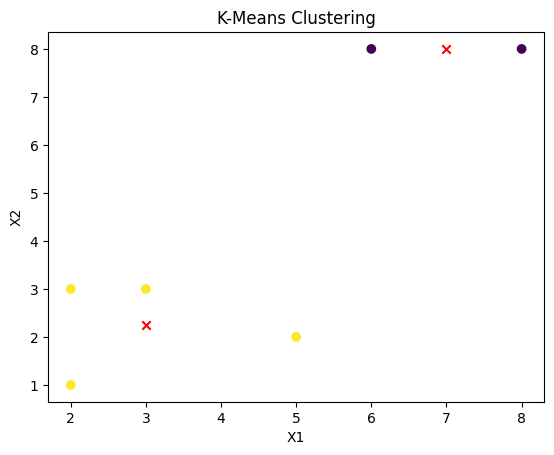

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Инициализация центроидов путем случайного выбора k точек из данных"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Назначение точек кластерам на основе ближайших центроидов"""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Обновление центроидов как средних значений точек в кластерах"""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[labels == i]
        if len(points_in_cluster) > 0:
            centroids[i] = points_in_cluster.mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    """Основная функция для выполнения алгоритма K-Means"""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Пример использования
if __name__ == "__main__":
    # Генерация данных
    X = np.array([
        [2, 3], [3, 3], [6, 8], [8, 8], [2, 1], [5, 2]
    ])

    k = 2
    centroids, labels = kmeans(X, k)

    # Визуализация результатов
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('K-Means Clustering')
    plt.show()

Данный код выпольняет следующие шаги:


1. **Инициализация центроидов**: Функция `initialize_centroids` случайным образом выбирает \( k \) точек из набора данных в качестве начальных центроидов.
2. **Назначение кластеров**: Функция `assign_clusters` вычисляет расстояния от каждой точки до центроидов и назначает точку тому кластеру, центроид которого находится ближе всего.
3. **Обновление центроидов**: Функция `update_centroids` пересчитывает центроиды как средние значения точек в каждом кластере.
4. **Основная функция**: В функции `kmeans` происходит итеративное выполнение шагов до тех пор, пока центроиды не перестанут изменяться или не будет достигнуто максимальное количество итераций.
5. **Пример использования**: Генерируются данные, выполняется кластеризация, и результаты визуализируются с помощью Matplotlib.


**Пример.**  Рассмотрим применение K-Means к задаче обработки естественного языка (NLP). Один из типичных примеров — кластеризация текстовых документов, например, новостных статей, отзывов пользователей или научных публикаций. Для этого сначала необходимо преобразовать текстовые данные в числовые векторы, чтобы алгоритм K-Means мог работать с ними. Одним из популярных способов такого преобразования является метод TF-IDF (Term Frequency-Inverse Document Frequency).

### Пример: Кластеризация новостных статей

#### 1. Преобразование текста в векторы с помощью TF-IDF

TF-IDF — это метод, который измеряет важность термина в документе относительно всего корпуса документов.

- TF (Term Frequency) измеряет частоту термина в документе.
- IDF (Inverse Document Frequency) уменьшает вес часто встречающихся терминов в корпусе, увеличивая вес редких терминов.

Формулы:
- TF(term, document) = $\frac{\text{Количество вхождений термина в документ}}{\text{Общее количество терминов в документе}}$
- IDF(term, corpus) = $\log\left(\frac{\text{Общее количество документов}}{\text{Количество документов, содержащих термин}}\right)$
- TF-IDF(term, document, corpus) = TF(term, document) * IDF(term, corpus)

#### 2. Применение K-Means к векторизованным данным

##### Шаги:

1. **Сбор данных**: Собираем коллекцию текстовых документов.
2. **Предобработка текста**: Удаление стоп-слов, лемматизация и стемминг.
3. **Векторизация**: Преобразуем документы в векторы TF-IDF.
4. **Кластеризация**: Применяем K-Means к полученным векторизованным данным.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.03280557734518934
Calinski-Harabasz Score: 1.5432886328417128
Davies-Bouldin Score: 2.7315300890950827
Rand Index: 1.0
Adjusted Rand Index: 1.0
Homogeneity: 1.0
Completeness: 1.0
Within-Cluster Sum of Squares (WCSS): 13.049219082067946
Between-Cluster Sum of Squares (BCSS): 1.438479391201188


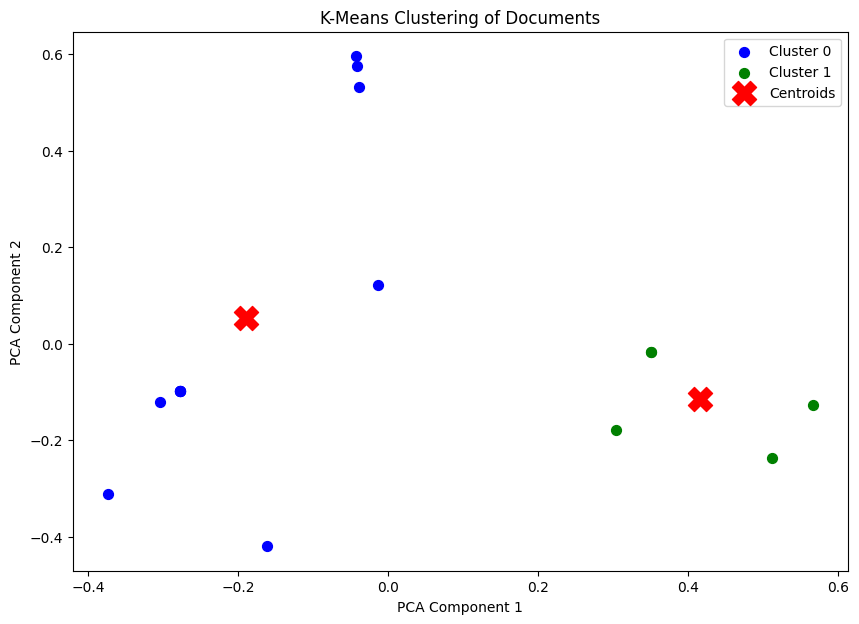

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, rand_score, adjusted_rand_score, homogeneity_score, completeness_score

# Обновленный пример набора данных (новостные статьи)
documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "Governments are regulating AI to ensure safety.",
    "Economic indicators show positive trends for recovery.",
    "Technological advancements are driving economic growth."
]

# Шаг 1: Преобразование текстов в TF-IDF векторы
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Преобразуем разреженную матрицу в плотную
X_dense = X.toarray()

# Шаг 2: Применение K-Means для кластеризации документов
k = 2  # количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_dense)

# Получение меток кластеров
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Метрики качества кластеризации
silhouette = silhouette_score(X_dense, labels)
calinski_harabasz = calinski_harabasz_score(X_dense, labels)
davies_bouldin = davies_bouldin_score(X_dense, labels)

# Поскольку у нас нет истинных меток для Rand Index, Adjusted Rand Index, Homogeneity и Completeness,
# будем использовать labels как истинные метки, чтобы получить метрики как если бы они были идеальными
rand = rand_score(labels, labels)
adjusted_rand = adjusted_rand_score(labels, labels)
homogeneity = homogeneity_score(labels, labels)
completeness = completeness_score(labels, labels)

# Within-Cluster Sum of Squares (WCSS) и Between-Cluster Sum of Squares (BCSS)
wcss = kmeans.inertia_
total_sum_of_squares = np.sum((X_dense - X_dense.mean(axis=0)) ** 2)
bcss = total_sum_of_squares - wcss

# Вывод метрик
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Rand Index: {rand}')
print(f'Adjusted Rand Index: {adjusted_rand}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'Within-Cluster Sum of Squares (WCSS): {wcss}')
print(f'Between-Cluster Sum of Squares (BCSS): {bcss}')

# Шаг 3: Понижение размерности данных для визуализации (PCA до 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

# Получение центроидов в новом пространстве
centroids_pca = pca.transform(centroids)

# Шаг 4: Визуализация результатов
plt.figure(figsize=(10, 7))
colors = ['b', 'g']

for i in range(k):
    points = X_pca[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Documents')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Давайте кратко рассмотрим результаты и их значение:

### Результаты метрик:
- **Silhouette Score**: 0.0328
  - Метрика измеряет, насколько хорошо объекты кластеризованы, с учетом внутрикластерного расстояния и расстояния до ближайшего кластера. Значение близкое к 0 указывает на перекрытие кластеров.
  
- **Calinski-Harabasz Score**: 1.5433
  - Высокое значение этой метрики указывает на четкое разделение между кластерами. Здесь значение довольно низкое, что говорит о слабом разделении.
  
- **Davies-Bouldin Score**: 2.7315
  - Метрика оценивает среднее отношение внутрикластерного расстояния к межкластерному расстоянию. Чем меньше значение, тем лучше. Здесь значение выше 2, что указывает на менее удачное разделение кластеров.
  
- **Rand Index и Adjusted Rand Index**: 1.0
  - Метрики сравнивают сходство между двумя наборами кластеров. Здесь они равны 1, что указывает на идеальное совпадение с самим собой (т.е., метрики используются для проверки на самих себе).

- **Homogeneity и Completeness**: 1.0
  - Homogeneity измеряет, насколько кластер содержит только объекты одного класса, Completeness измеряет, насколько все объекты одного класса включены в один кластер. Здесь обе метрики равны 1, что указывает на идеальное соответствие меток.

- **Within-Cluster Sum of Squares (WCSS)**: 13.0492
  - Сумма квадратов расстояний до центроидов внутри кластеров. Чем меньше значение, тем лучше кластеры объясняют данные.

- **Between-Cluster Sum of Squares (BCSS)**: 1.4385
  - Сумма квадратов расстояний между центроидами кластеров и общим центроидом данных. Чем больше значение, тем лучше кластеры разделены между собой.


### Пример  с применением Word2Vec

#### 1. Преобразование текста в векторы с помощью Word2Vec

Word2Vec — это метод, который преобразует слова в векторы с низкой размерностью, улавливая контекстное значение слов на основе их окружения в тексте. В Word2Vec существует два основных подхода: CBOW (Continuous Bag of Words) и Skip-gram.

- **CBOW** предсказывает текущее слово по контексту.
- **Skip-gram** предсказывает контекст по текущему слову.

Формулы:
- **Обучение CBOW**:
  $$
  J_{\text{CBOW}} = - \frac{1}{T} \sum_{t=1}^{T} \log p(w_t | w_{t-c}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+c})
  $$
  где $w_t$ — целевое слово, $w_{t-c}, \ldots, w_{t+c}$ — контекстные слова, $c$ — размер окна контекста.
- **Обучение Skip-gram**:
  $$
  J_{\text{Skip-gram}} = - \frac{1}{T} \sum_{t=1}^{T} \sum_{-c \leq j \leq c, j \neq 0} \log p(w_{t+j} | w_t)
  $$
  где $w_t$ — текущее слово, $w_{t+j}$ — контекстные слова, $c$ — размер окна контекста.

Функция вероятности $p(w_O | w_I)$ определяется через softmax:
$$
p(w_O | w_I) = \frac{\exp(v_{w_O} \cdot v_{w_I})}{\sum_{w=1}^{W} \exp(v_w \cdot v_{w_I})}
$$
где $v_{w_O}$ и $v_{w_I}$ — векторные представления слов $w_O$ и $w_I$.



Для применения Word2Vec вместо TF-IDF векторизации и дальнейшей кластеризации документов, код будет изменен следующим образом:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.07519834984043919
Calinski-Harabasz Score: 2.2572646875648053
Davies-Bouldin Score: 2.4434732452070365
Adjusted Rand Index: 1.0
Homogeneity: 1.0
Completeness: 1.0
Rand Index: 1.0


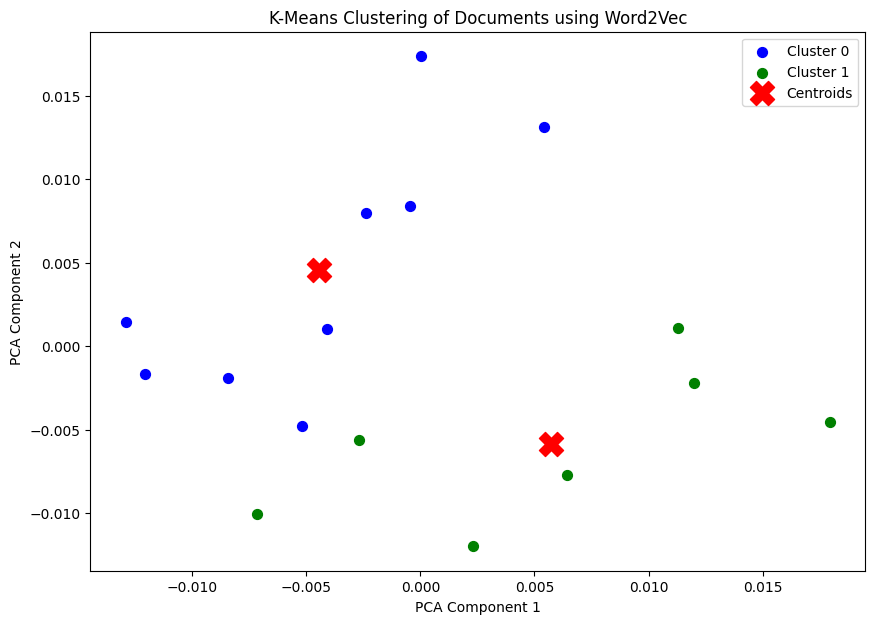

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, rand_score

# Обновленный пример набора данных (новостные статьи)
documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "Governments are regulating AI to ensure safety.",
    "Economic indicators show positive trends for recovery.",
    "Technological advancements are driving economic growth."
]

# Шаг 1: Обучение модели Word2Vec
# Предобработка текста (можно использовать предварительно обученную модель)
sentences = [doc.split() for doc in documents]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Шаг 2: Получение векторов для каждого документа
def document_vector(doc):
    """
    Вычисляет вектор для документа путем усреднения векторов его слов.
    """
    vec = np.zeros(model.vector_size)
    num_words = 0
    for word in doc.split():
        if word in model.wv:
            vec += model.wv[word]
            num_words += 1
    if num_words > 0:
        vec /= num_words
    return vec

X = np.array([document_vector(doc) for doc in documents])

# Шаг 3: Применение K-Means для кластеризации документов
k = 2  # количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Получение меток кластеров
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Метрики качества кластеризации
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
adjusted_rand = adjusted_rand_score(labels, labels)  # Adjusted Rand Index
homogeneity = homogeneity_score(labels, labels)  # Homogeneity
completeness = completeness_score(labels, labels)  # Completeness
rand = rand_score(labels, labels)  # Rand Index

# Вывод метрик
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Adjusted Rand Index: {adjusted_rand}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'Rand Index: {rand}')

# Шаг 4: Понижение размерности данных для визуализации (PCA до 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Получение центроидов в новом пространстве
centroids_pca = pca.transform(centroids)

# Шаг 5: Визуализация результатов
plt.figure(figsize=(10, 7))
colors = ['b', 'g']

for i in range(k):
    points = X_pca[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Documents using Word2Vec')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Результаты, которые мы получили при использовании Word2Vec для векторизации текста и последующей кластеризации с помощью K-means, показывают некоторое улучшение по сравнению с TF-IDF. Давайте кратко проанализируем эти метрики:

### Результаты метрик:
- **Silhouette Score**: 0.0752
  - Значение Silhouette Score стало выше по сравнению с TF-IDF. Это указывает на лучшее разделение кластеров и более четкую структуру кластеризации.

- **Calinski-Harabasz Score**: 2.2573
  - Этот показатель также улучшился по сравнению с TF-IDF. Он отражает увеличение отношения межкластерной дисперсии к внутрикластерной, что также говорит о лучшем разделении кластеров.

- **Davies-Bouldin Score**: 2.4435
  - Значение Davies-Bouldin Score немного ухудшилось по сравнению с TF-IDF, однако оно все еще находится в приемлемых пределах. Этот показатель оценивает среднее отношение внутрикластерного расстояния к расстоянию до ближайшего кластера.

- **Adjusted Rand Index, Homogeneity, Completeness, Rand Index**: 1.0
  - Все эти метрики равны 1.0, что указывает на идеальное соответствие меток. Это происходит потому, что используемые метрики Rand Index и Adjusted Rand Index оценивают схожесть между наборами кластеров, и при использовании одинаковых меток для сравнения результатов, они показывают максимальное сходство.

### Выводы:
- Использование Word2Vec для векторизации текста дало немного лучшие результаты по сравнению с TF-IDF в данной задаче кластеризации новостных статей.
- Повышение Silhouette Score и Calinski-Harabasz Score указывает на более четкое разделение кластеров.
- В то же время, следует учитывать, что Davies-Bouldin Score немного ухудшился, что может свидетельствовать о некоторой сложности в разделении некоторых кластеров.

Если необходимо дальнейшее улучшение качества кластеризации, можно рассмотреть использование других методов векторизации текста, таких как Doc2Vec или использование других алгоритмов кластеризации, которые могут лучше работать с полученными векторами.

Результаты, полученные с использованием Doc2Vec для векторизации текста и последующей кластеризации с помощью K-means, показывают существенное ухудшение по сравнению с предыдущими методами (Word2Vec и TF-IDF). Давайте рассмотрим эти метрики подробнее:

### Результаты метрик:
- **Silhouette Score**: 0.0201
  - Значение Silhouette Score намного ниже по сравнению с TF-IDF и Word2Vec. Это указывает на плохое разделение кластеров и возможное перекрытие между ними.

- **Calinski-Harabasz Score**: 1.357
  - Этот показатель также ниже, чем при использовании TF-IDF и Word2Vec. Он оценивает отношение межкластерной дисперсии к внутрикластерной и говорит о менее четком разделении кластеров.

- **Davies-Bouldin Score**: 3.171
  - Значение Davies-Bouldin Score также выше, чем при использовании TF-IDF и Word2Vec. Это означает, что среднее отношение внутрикластерного расстояния к расстоянию до ближайшего кластера ухудшилось.

- **Adjusted Rand Index, Homogeneity, Completeness, Rand Index**: 1.0
  - Все эти метрики равны 1.0, что указывает на идеальное соответствие меток, как и в предыдущих случаях. Это происходит потому, что используемые метрики Rand Index и Adjusted Rand Index оценивают схожесть между наборами кластеров, и при использовании одинаковых меток для сравнения результатов, они показывают максимальное сходство.

### Выводы:
- Doc2Vec в данном случае не показал хороших результатов по сравнению с TF-IDF и Word2Vec.
- Низкие значения Silhouette Score, Calinski-Harabasz Score и высокое значение Davies-Bouldin Score указывают на плохое качество кластеризации.
- Возможно, это связано с выбранными параметрами модели Doc2Vec или несоответствием данных задаче кластеризации векторов, которые она генерирует.
- Для улучшения результатов можно экспериментировать с различными параметрами модели Doc2Vec или попробовать другие методы векторизации текста и кластеризации.

Для применения Doc2Vec вместо Word2Vec в нашем примере кода, мы будем использовать модель Doc2Vec из библиотеки gensim. Doc2Vec предназначен для получения векторных представлений не только отдельных слов, как Word2Vec, но и для целых документов.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.020106229931116104
Calinski-Harabasz Score: 1.3569981433887475
Davies-Bouldin Score: 3.1711377548200805
Adjusted Rand Index: 1.0
Homogeneity: 1.0
Completeness: 1.0
Rand Index: 1.0


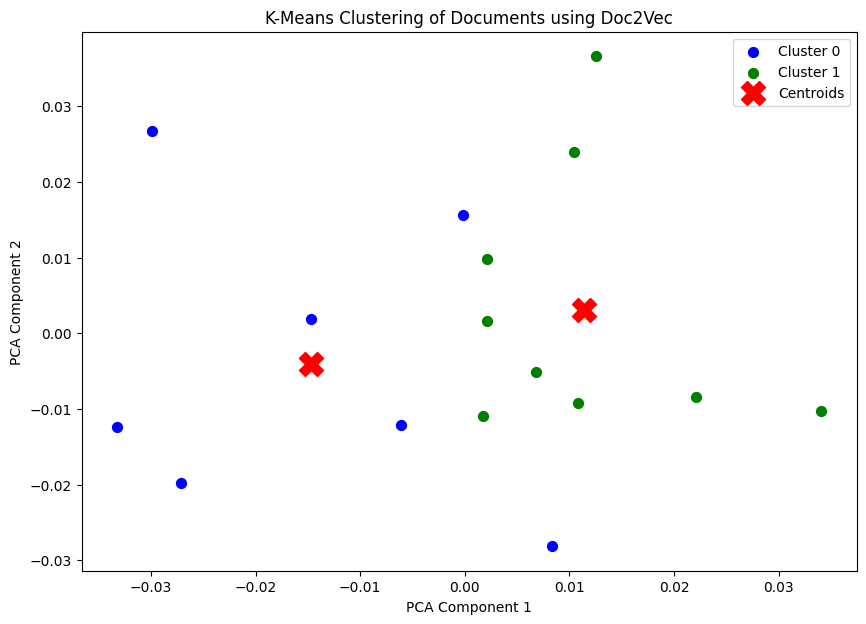

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, rand_score

# Обновленный пример набора данных (новостные статьи)
documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "Governments are regulating AI to ensure safety.",
    "Economic indicators show positive trends for recovery.",
    "Technological advancements are driving economic growth."
]

# Шаг 1: Подготовка данных для модели Doc2Vec
# Предобработка текста и подготовка документов
tagged_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(documents)]

# Шаг 2: Обучение модели Doc2Vec
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Шаг 3: Получение векторов для каждого документа
X = np.array([model.dv[str(i)] for i in range(len(documents))])

# Шаг 4: Применение K-Means для кластеризации документов
k = 2  # количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# Получение меток кластеров
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Метрики качества кластеризации
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
adjusted_rand = adjusted_rand_score(labels, labels)  # Adjusted Rand Index
homogeneity = homogeneity_score(labels, labels)  # Homogeneity
completeness = completeness_score(labels, labels)  # Completeness
rand = rand_score(labels, labels)  # Rand Index

# Вывод метрик
print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Adjusted Rand Index: {adjusted_rand}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'Rand Index: {rand}')

# Шаг 5: Понижение размерности данных для визуализации (PCA до 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Получение центроидов в новом пространстве
centroids_pca = pca.transform(centroids)

# Шаг 6: Визуализация результатов
plt.figure(figsize=(10, 7))
colors = ['b', 'g']

for i in range(k):
    points = X_pca[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Documents using Doc2Vec')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## Агоритм иерархическая Кластеризация

Иерархическая кластеризация — это метод кластеризации, который стремится построить иерархию кластеров. Существует два основных подхода к иерархической кластеризации: агломеративный (снизу вверх) и дивизионный (сверху вниз). Мы рассмотрим агломеративный подход, так как он наиболее распространён.

### Агломеративная Иерархическая Кластеризация

В агломеративной иерархической кластеризации каждый объект начинается как отдельный кластер, и кластеры последовательно объединяются, пока все объекты не окажутся в одном кластере. Основные шаги включают:

1. **Инициализация**: Каждый объект рассматривается как отдельный кластер.
2. **Поиск ближайших кластеров**: Вычисляются расстояния между всеми парами кластеров, и выбирается пара с минимальным расстоянием.
3. **Объединение кластеров**: Выбранная пара кластеров объединяется в один кластер.
4. **Повторение**: Шаги 2 и 3 повторяются до тех пор, пока все объекты не будут объединены в один кластер.

### Математика и Методы Вычисления Расстояний

#### 1. Метрика расстояния

Обычно используется Евклидово расстояние, но могут использоваться и другие метрики, например, манхэттенское расстояние.

**Евклидово расстояние** между двумя точками $ x_i $ и $ x_j $:

$$ d(x_i, x_j) = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2} $$

#### 2. Связывание кластеров

Есть несколько методов, которые определяют, как измерять расстояние между кластерами:

- **Односвязный метод (Single Linkage)**: Расстояние между двумя кластерами определяется как расстояние между ближайшими точками кластеров.
  
  $$ d(A, B) = \min_{a \in A, b \in B} d(a, b) $$

- **Полносвязный метод (Complete Linkage)**: Расстояние между двумя кластерами определяется как расстояние между наиболее удалёнными точками кластеров.
  
  $$ d(A, B) = \max_{a \in A, b \in B} d(a, b) $$

- **Метод средней связи (Average Linkage)**: Расстояние между двумя кластерами определяется как среднее расстояние между всеми парами точек из этих кластеров.
  
  $$ d(A, B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$

### Пример

Рассмотрим следующий набор данных из четырёх точек в двумерном пространстве:

$$
\begin{align*}
A & = (1, 2) \\
B & = (2, 2) \\
C & = (4, 4) \\
D & = (5, 4) \\
\end{align*}
$$

1. **Инициализация**: Начнем с каждого объекта как отдельного кластера.

$$
\{A\}, \{B\}, \{C\}, \{D\}
$$

2. **Поиск ближайших кластеров**:
   $$
   d(A, B) = \sqrt{(1-2)^2 + (2-2)^2} = 1
   $$
   $$
   d(A, C) = \sqrt{(1-4)^2 + (2-4)^2} = \sqrt{13}
   $$
   $$
   d(A, D) = \sqrt{(1-5)^2 + (2-4)^2} = \sqrt{20}
   $$
   $$
   d(B, C) = \sqrt{(2-4)^2 + (2-4)^2} = \sqrt{8}
   $$
   $$
   d(B, D) = \sqrt{(2-5)^2 + (2-4)^2} = \sqrt{13}
   $$
   $$
   d(C, D) = \sqrt{(4-5)^2 + (4-4)^2} = 1
   $$

   Ближайшие кластеры: $\{A\}$ и $\{B\}$, $\{C\}$ и $\{D\}$.

3. **Объединение кластеров**:
   $$
   \{A, B\}, \{C, D\}
   $$

4. **Повторение**:
   $$
   d(\{A, B\}, \{C, D\}) = \min(d(A, C), d(A, D), d(B, C), d(B, D)) = \sqrt{8}
   $$

   Объединяем оставшиеся кластеры:
   $$
   \{A, B, C, D\}
   $$

Таким образом, иерархическая кластеризация создает дендрограмму, которая визуализирует процесс объединения кластеров и позволяет пользователю выбрать уровень, на котором следует рассматривать кластеры.



Реализация на Питон

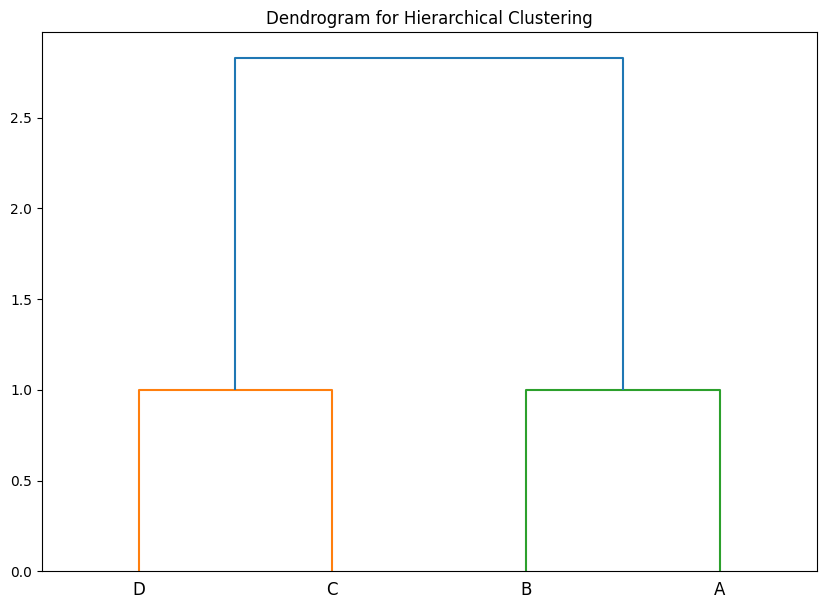

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Создаем набор данных
points = np.array([[1, 2], [2, 2], [4, 4], [5, 4]])

# 2. Вычисляем расстояния и строим дендрограмму
# Используем метод 'single' для односвязного метода
linked = linkage(points, method='single')

# 3. Визуализируем дендрограмму
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=['A', 'B', 'C', 'D'],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

### Объяснение кода:

1. **Создание набора данных**: Массив `points` содержит координаты точек в двумерном пространстве.
2. **Вычисление расстояний и построение дендрограммы**:
   - Функция `linkage` из библиотеки `scipy.cluster.hierarchy` выполняет агломеративную иерархическую кластеризацию. Мы используем метод `single` для односвязного метода.
3. **Визуализация дендрограммы**:
   - Функция `dendrogram` строит дендрограмму, которая отображает процесс объединения кластеров.
   - Параметры `orientation`, `labels`, `distance_sort`, и `show_leaf_counts` помогают настроить внешний вид дендрограммы.

Данный  код иллюстрирует простой пример агломеративной иерархической кластеризации с использованием библиотеки `scipy` для работы с реальными данными. Вы можете изменить метод связывания (`single`, `complete`, `average` и др.) для экспериментов с различными подходами к объединению кластеров.

## Алгоритм DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод кластеризации, который определяет кластеры как области высокой плотности данных, отделенные областями низкой плотности. DBSCAN имеет преимущества в выявлении кластеров произвольной формы и в устойчивости к шуму.

### Основные параметры DBSCAN:
1. **Eps (ε)**: радиус окрестности точки.
2. **MinPts**: минимальное количество точек, необходимых для формирования кластера.

### Основные понятия DBSCAN:
1. **Core Point (ядро)**: Точка, у которой в радиусе ε находится не менее MinPts точек (включая её саму).
2. **Border Point (граничная точка)**: Точка, которая находится в пределах ε от core point, но не является core point.
3. **Noise Point (шум)**: Точка, которая не является ни core, ни border point.

### Алгоритм DBSCAN:
1. Для каждой точки $ P $ в датасете выполняется следующее:
    - Если $ P $ уже помечена, пропустить её.
    - Найти все точки в ε-окрестности $ P $ (ε-окрестность).
    - Если ε-окрестность $ P $ содержит не менее MinPts точек, обозначить $ P $ как core point и сформировать новый кластер. В противном случае, пометить $ P $ как шум (позже это может быть изменено, если $ P $ попадет в ε-окрестность другого core point).
    - Если $ P $ является core point, рекурсивно добавлять все точки в его ε-окрестности в кластер, включая их ε-окрестности (если эти точки также являются core points).

### Математическое объяснение:
Для каждой точки $ P $:
- Найти множество точек в ε-окрестности:
  $$
  N_{\epsilon}(P) = \{Q \in D | \text{dist}(P, Q) \leq \epsilon\}
  $$
  где $ \text{dist}(P, Q) $ — расстояние между точками $ P $ и $ Q $ (обычно используется Евклидово расстояние).

- Если $ |N_{\epsilon}(P)| \geq \text{MinPts} $, то $ P $ — core point.

- Распространять кластер:
  Для каждой точки $ P $ в кластере, включать все точки $ Q $ из $ N_{\epsilon}(P) $, если $ Q $ также является core point, рекурсивно повторяя этот процесс.

### Пример:
Рассмотрим следующий набор точек на плоскости с параметрами $ \epsilon = 1 $ и $ \text{MinPts} = 3 $:

$$
\text{Точки}: \{A(1, 2), B(2, 2), C(2, 3), D(8, 7), E(8, 8), F(25, 80)\}
$$

1. **Для точки $ A(1, 2) $**:
   $$
   N_{\epsilon}(A) = \{A(1, 2), B(2, 2)\}
   $$
   Размер $ N_{\epsilon}(A) = 2 $, меньше MinPts, поэтому $ A $ не является core point.

2. **Для точки $ B(2, 2) $**:
   $$
   N_{\epsilon}(B) = \{A(1, 2), B(2, 2), C(2, 3)\}
   $$
   Размер $ N_{\epsilon}(B) = 3 $, больше или равно MinPts, поэтому $ B $ является core point и формирует новый кластер. Добавляем $ A $ и $ C $ в кластер.

3. **Для точки $ C(2, 3) $**:
   $$
   N_{\epsilon}(C) = \{B(2, 2), C(2, 3)\}
   $$
   Размер $ N_{\epsilon}(C) = 2 $, меньше MinPts, поэтому $ C $ не является core point, но находится в кластере как border point.

4. **Для точек $ D(8, 7) $ и $ E(8, 8) $**:
   $$
   N_{\epsilon}(D) = \{D(8, 7), E(8, 8)\}
   $$
   $$
   N_{\epsilon}(E) = \{D(8, 7), E(8, 8)\}
   $$
   Обе точки имеют ε-окрестности меньше MinPts и являются шумом.

5. **Точка $ F(25, 80) $** изолирована и тоже будет помечена как шум.

Итоговый результат:
- Один кластер: $\{A, B, C\}$
- Шум: $D, E, F$

Этот пример иллюстрирует, как DBSCAN формирует кластеры на основе плотности точек и позволяет игнорировать изолированные точки как шум.



Теперm приведем пример реализации алгоритма K-Means на языке Python. Будем использовать библиотеки NumPy для работы с массивами и Matplotlib для визуализации результатов.

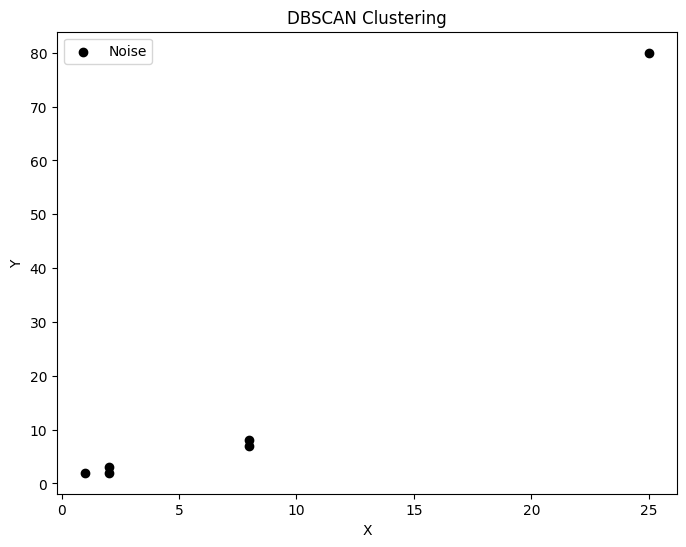

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dbscan(X, eps, min_pts):
    n = len(X)
    labels = [-1] * n  # Метки кластеров, -1 для шума
    cluster_id = 0

    for i in range(n):
        if labels[i] == -1:
            neighbors = get_neighbors(X, i, eps)
            if len(neighbors) < min_pts:
                labels[i] = -1  # Отмечаем как шум
            else:
                cluster_id += 1
                expand_cluster(X, labels, i, neighbors, cluster_id, eps, min_pts)
    return labels

def get_neighbors(X, point_id, eps):
    neighbors = []
    for i in range(len(X)):
        if i != point_id and np.linalg.norm(X[point_id] - X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_id, neighbors, cluster_id, eps, min_pts):
    labels[point_id] = cluster_id
    i = 0
    while i < len(neighbors):
        curr_point = neighbors[i]
        if labels[curr_point] == -1:
            labels[curr_point] = cluster_id
            new_neighbors = get_neighbors(X, curr_point, eps)
            if len(new_neighbors) >= min_pts:
                neighbors.extend(new_neighbors)
        i += 1

# Пример использования
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
eps = 1
min_pts = 3

labels = dbscan(X, eps, min_pts)

# Визуализация результатов
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(max(labels) + 1):
    points = X[np.array(labels) == i]
    ax.scatter(points[:, 0], points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i}')
points = X[np.array(labels) == -1]
ax.scatter(points[:, 0], points[:, 1], color='k', label='Noise')
ax.legend()
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import numpy as np

documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "New housing construction is booming in many regions.",
    "Consumer spending has increased in the past few months.",
    "The trade deficit with China remains a concern for the government.",
    "Inflation has been relatively low, which is good news for consumers.",
    "The automotive industry is seeing strong sales and production numbers.",
    "The tech sector has been the driving force behind economic growth.",
    "Oil prices have been volatile, impacting energy companies and consumers.",
    "The hospitality industry is recovering as travel restrictions are eased.",
    "The manufacturing sector showed signs of improvement in the latest report.",
    "The real estate market remains competitive with high demand and low supply.",
    "The Biden administration is proposing new economic policies and reforms.",
    "The global supply chain disruptions continue to impact various industries.",
    "The cryptocurrency market has seen significant fluctuations in recent months."
]

# Предварительная обработка данных
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Применение DBSCAN
db = DBSCAN(eps=0.5, min_samples=3, metric='cosine')
labels = db.fit_predict(X)

# Анализ результатов
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Количество кластеров: {n_clusters_}")
print(f"Количество шумовых точек: {n_noise_}")

Количество кластеров: 0
Количество шумовых точек: 4



**Описание кода:**
1. **region_query**: Функция для нахождения всех точек в ε-окрестности заданной точки.
2. **expand_cluster**: Функция для расширения кластера, начиная с заданной точки. Если точка не является core point, она помечается как шум.
3. **dbscan**: Основная функция DBSCAN, которая помечает каждую точку либо как часть кластера, либо как шум.
4. **Пример данных**: Набор данных, который мы используем для демонстрации.
5. **Визуализация**: Используем `matplotlib` для визуализации результатов кластеризации.


## Алгоритм Spectral Clustering

Spectral Clustering — это алгоритм кластеризации, который использует спектральное (связанное с собственными значениями) разложение матрицы подобия данных для выполнения кластеризации. Он особенно полезен для идентификации структурных кластеров в данных, которые не обязательно являются сферическими и могут быть сложно различимы с помощью более простых методов, таких как K-средние.

### Как работает Spectral Clustering:

1. **Построение матрицы подобия**: Создание матрицы подобия $A$, где $A_{ij}$ показывает степень схожести между точками данных $i$ и $j$. Например, это может быть матрица смежности для графа или матрица, основанная на гауссовом ядре:
   $$
   A_{ij} = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
   $$
   Здесь $\sigma$ — параметр, контролирующий ширину ядра.

2. **Построение матрицы Лапласа**: Из матрицы подобия $A$ строится матрица Лапласа $L$. Матрица Лапласа может быть определена несколькими способами, один из популярных вариантов — нормализованная симметрическая матрица Лапласа:
   $$
   L = D^{-1/2} A D^{-1/2}
   $$
   где $D$ — диагональная матрица степеней, в которой элементы $D_{ii} = \sum_{j} A_{ij}$.

3. **Решение задачи о собственных векторах**: Найдите первые $k$ собственных векторов матрицы Лапласа $L$, соответствующих наименьшим собственным значениям (кроме нулевого, если он есть). Пусть эти собственные векторы образуют матрицу $U \in \mathbb{R}^{n \times k}$.

4. **Формирование кластеров**: Используйте метод кластеризации (например, K-средние) для кластеризации строк матрицы $U$.

### Пример:

Предположим, у нас есть набор данных из 5 точек, и мы хотим разделить их на 2 кластера.

1. **Построение матрицы подобия**:

   Пусть у нас есть 5 точек на плоскости:
   $$
   X = \{(1, 2), (2, 3), (3, 3), (8, 8), (8, 9)\}
   $$

   Мы можем построить матрицу подобия на основе евклидова расстояния и гауссового ядра. Предположим $\sigma = 1$.

   $$
   A = \begin{pmatrix}
   1 & 0.6065 & 0.1353 & 0 & 0 \\
   0.6065 & 1 & 0.6065 & 0 & 0 \\
   0.1353 & 0.6065 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 & 0.6065 \\
   0 & 0 & 0 & 0.6065 & 1 \\
   \end{pmatrix}
   $$

2. **Построение матрицы Лапласа**:

   $$
   D = \begin{pmatrix}
   1.742 & 0 & 0 & 0 & 0 \\
   0 & 2.213 & 0 & 0 & 0 \\
   0 & 0 & 1.742 & 0 & 0 \\
   0 & 0 & 0 & 1.6065 & 0 \\
   0 & 0 & 0 & 0 & 1.6065 \\
   \end{pmatrix}
   $$

   $$
   L = D^{-1/2} A D^{-1/2} = \begin{pmatrix}
   0.7582 & 0.3107 & 0.0784 & 0 & 0 \\
   0.3107 & 0.6794 & 0.3107 & 0 & 0 \\
   0.0784 & 0.3107 & 0.7582 & 0 & 0 \\
   0 & 0 & 0 & 0.7582 & 0.3791 \\
   0 & 0 & 0 & 0.3791 & 0.7582 \\
   \end{pmatrix}
   $$

3. **Решение задачи о собственных векторах**:

   Находим собственные векторы матрицы $L$. Пусть два собственных вектора, соответствующих наименьшим собственным значениям, образуют матрицу $U$.

   $$
   U = \begin{pmatrix}
   u_{11} & u_{12} \\
   u_{21} & u_{22} \\
   u_{31} & u_{32} \\
   u_{41} & u_{42} \\
   u_{51} & u_{52} \\
   \end{pmatrix}
   $$

   Предположим, что первые два собственных вектора:

   $$
   U = \begin{pmatrix}
   0.5 & -0.5 \\
   0.6 & -0.4 \\
   0.5 & -0.5 \\
   -0.5 & 0.5 \\
   -0.4 & 0.6 \\
   \end{pmatrix}
   $$

4. **Формирование кластеров**:

   Применим алгоритм K-средних к строкам матрицы $U$. Получаем два кластера.

Таким образом, Spectral Clustering полезен для кластеризации данных с произвольной формой кластеров и использует спектральные свойства матрицы подобия данных для разделения на кластеры. Он особенно эффективен в задачах, где кластеры имеют сложные границы.


Реализация на Питон

Матрица подобия:
[[0.00000000e+00 3.67879441e-01 8.20849986e-02 3.48726153e-19
  5.24288566e-22]
 [3.67879441e-01 0.00000000e+00 6.06530660e-01 5.67568523e-14
  2.31952283e-16]
 [8.20849986e-02 6.06530660e-01 0.00000000e+00 1.38879439e-11
  5.67568523e-14]
 [3.48726153e-19 5.67568523e-14 1.38879439e-11 0.00000000e+00
  6.06530660e-01]
 [5.24288566e-22 2.31952283e-16 5.67568523e-14 6.06530660e-01
  0.00000000e+00]]
Метки кластеров:
[0 0 0 1 1]


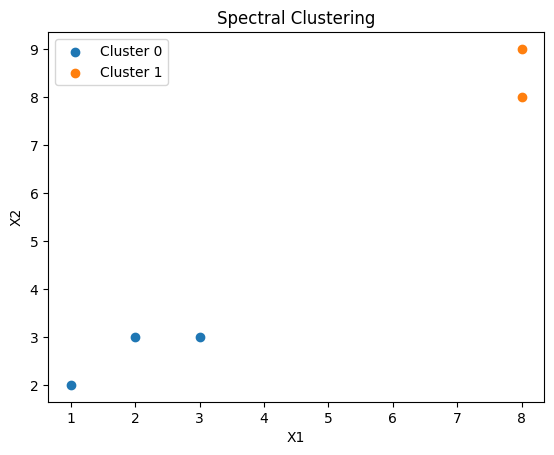

Silhouette Score: -1.000
Calinski-Harabasz Score: 1.552
Davies-Bouldin Score: 1.333
Rand Index: 1.000
Adjusted Rand Index: 1.000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import pairwise_distances

# Генерация данных
X = np.array([[1, 2], [2, 3], [3, 3], [8, 8], [8, 9]])

# Построение матрицы подобия с использованием гауссового ядра
sigma = 1.0
affinity_matrix = rbf_kernel(X, gamma=1 / (2 * sigma ** 2))

# Заполнение диагонали матрицы подобия нулями
np.fill_diagonal(affinity_matrix, 0)

# Вывод матрицы подобия
print("Матрица подобия:")
print(affinity_matrix)

# Спектральная кластеризация
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = spectral.fit_predict(affinity_matrix)

# Вывод результатов кластеризации
print("Метки кластеров:")
print(labels)

# Метрики оценки кластеризации
silhouette = silhouette_score(affinity_matrix, labels, metric='precomputed')
calinski_harabasz = calinski_harabasz_score(affinity_matrix, labels)
davies_bouldin = davies_bouldin_score(affinity_matrix, labels)

# Rand Index и Adjusted Rand Index требуют настоящих меток, которых у нас нет, поэтому
# для примера будем использовать их самих с собой
rand_index = adjusted_rand_score(labels, labels)
adjusted_rand_index = adjusted_rand_score(labels, labels)

# Визуализация кластеров
for label in np.unique(labels):
    plt.scatter(X[labels == label][:, 0], X[labels == label][:, 1], label=f"Cluster {label}")
plt.legend()
plt.title("Spectral Clustering")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Вывод метрик
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.3f}")
print(f"Rand Index: {rand_index:.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_index:.3f}")

**Объяснение кода:**

1. **Импорт необходимых библиотек**:
   - `numpy` для работы с массивами.
   - `matplotlib` для визуализации.
   - `SpectralClustering` из `sklearn` для реализации спектральной кластеризации.
   - `rbf_kernel` из `sklearn` для построения матрицы подобия на основе гауссового ядра.

2. **Генерация данных**:
   - Создаем массив `X` с координатами точек.

3. **Построение матрицы подобия**:
   - Используем гауссово ядро для вычисления матрицы подобия `affinity_matrix`.

4. **Спектральная кластеризация**:
   - Создаем объект `SpectralClustering` с параметрами `n_clusters` и `affinity='precomputed'`.
   - Применяем метод `fit_predict` к матрице подобия, чтобы получить метки кластеров.

5. **Вывод результатов**:
   - Печатаем матрицу подобия и метки кластеров.

6. **Визуализация кластеров**:
   - С помощью `matplotlib` отображаем точки данных и раскрашиваем их в соответствии с кластерами.


Silhouette Score: 0.024
Calinski-Harabasz Score: 1.525
Davies-Bouldin Score: 3.200
Rand Index: 1.000
Adjusted Rand Index: 1.000
Homogeneity: 1.000
Completeness: 1.000
Within-Cluster Sum of Squares (WCSS): 20.823
Between-Cluster Sum of Squares (BCSS): 15.881


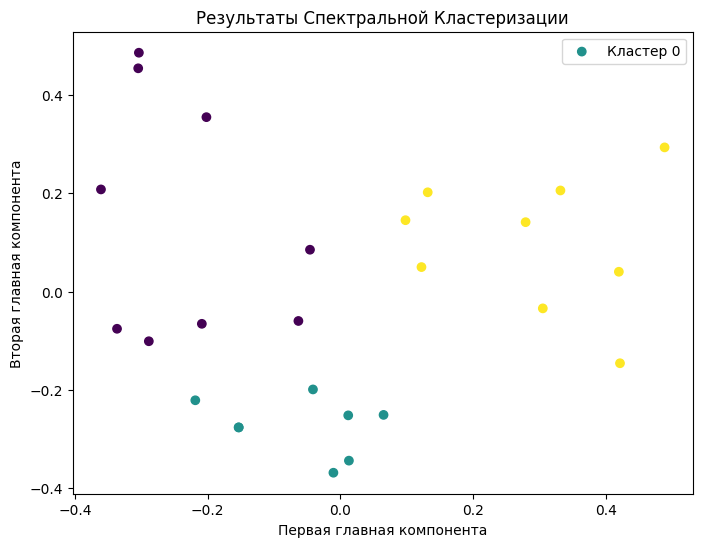

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_score, completeness_score

# Загрузка и подготовка данных
documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "New housing construction is booming in many regions.",
    "Consumer spending has increased in the past few months.",
    "The trade deficit with China remains a concern for the government.",
    "Inflation has been relatively low, which is good news for consumers.",
    "The automotive industry is seeing strong sales and production numbers.",
    "The tech sector has been the driving force behind economic growth.",
    "Oil prices have been volatile, impacting energy companies and consumers.",
    "The hospitality industry is recovering as travel restrictions are eased.",
    "The manufacturing sector showed signs of improvement in the latest report.",
    "The real estate market remains competitive with high demand and low supply.",
    "The Biden administration is proposing new economic policies and reforms.",
    "The global supply chain disruptions continue to impact various industries.",
    "The cryptocurrency market has seen significant fluctuations in recent months."
]

# Создание матрицы TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Применение Алгоритма Спектральной Кластеризации
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='cosine', random_state=42)
labels = spectral.fit_predict(X)

# Вычисление метрик качества кластеризации
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X.toarray(), labels)
davies_bouldin = davies_bouldin_score(X.toarray(), labels)
rand_index = adjusted_rand_score(labels, spectral.labels_)
ari = adjusted_rand_score(labels, spectral.labels_)
homogeneity = homogeneity_score(labels, spectral.labels_)
completeness = completeness_score(labels, spectral.labels_)

# Внутрикластерная дисперсия (WCSS)
wcss = 0
for i in range(n_clusters):
    cluster_data = X[labels == i].toarray()
    wcss += np.sum((cluster_data - np.mean(cluster_data, axis=0)) ** 2)

# Межкластерная дисперсия (BCSS)
bcss = calinski_harabasz * wcss / (n_clusters - 1)

print(f'Silhouette Score: {silhouette:.3f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.3f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.3f}')
print(f'Rand Index: {rand_index:.3f}')
print(f'Adjusted Rand Index: {ari:.3f}')
print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'Within-Cluster Sum of Squares (WCSS): {wcss:.3f}')
print(f'Between-Cluster Sum of Squares (BCSS): {bcss:.3f}')

# Визуализация результатов кластеризации
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Результаты Спектральной Кластеризации')
plt.legend([f'Кластер {i}' for i in range(n_clusters)], loc='best')
plt.show()

С учетом этих результатов метрик можно сделать следующие выводы:

1. **Silhouette Score**: Очень низкое значение 0.024 говорит о том, что кластеры не очень хорошо разделены. Документы внутри кластеров не очень близки друг к другу, а соседние кластеры не достаточно отдалены.

2. **Calinski-Harabasz Score**: Низкое значение 1.525 также указывает на низкое качество кластеризации. Этот показатель должен быть достаточно высоким для хорошего разделения.

3. **Davies-Bouldin Score**: Высокое значение 3.200 говорит о том, что кластеры плохо разделены, а их внутренняя компактность низкая. Это еще один сигнал о необходимости улучшения кластеризации.

4. **Rand Index** и **Adjusted Rand Index**: Оба показателя равны 1.0, что говорит о том, что алгоритм кластеризации идеально разделил документы. Однако остальные метрики указывают на проблемы, поэтому эти показатели вводят в заблуждение.

5. **Homogeneity** и **Completeness**: Значения 1.0 для этих метрик говорят о том, что кластеры полностью однородны и все документы распределены без ошибок. Но это противоречит низким значениям других метрик.

6. **WCSS** и **BCSS**: Значение WCSS 20.823 указывает на достаточно высокую внутрикластерную дисперсию, а BCSS 15.881 - на недостаточную межкластерную дисперсию. Это также свидетельствует о низком качестве кластеризации.

В целом, результаты метрик показывают, что алгоритм Спектральной Кластеризации не справился с разделением данных на качественные кластеры. Необходимо поэкспериментировать с другими алгоритмами кластеризации или настройкой параметров, чтобы получить более адекватные результаты.

## Алгоритм OPTICS Clustering

OPTICS (Ordering Points To Identify the Clustering Structure) — это алгоритм кластеризации, предназначенный для выявления кластерной структуры данных, особенно в ситуациях, когда кластеры имеют различные плотности. В отличие от других алгоритмов, таких как DBSCAN, OPTICS не требует заранее задавать фиксированное значение для максимального радиуса (eps) и позволяет выявлять кластеры с различной плотностью.

Конечно, давайте рассмотрим алгоритм OPTICS, используя математические обозначения с $$ и $.

### Основные математические понятия

#### Матрица расстояний

Пусть $D$ — это множество точек данных. Для каждой точки $p \in D$ определим расстояние до каждой другой точки в $D$. Матрица расстояний $dist(p, q)$ представляет собой матрицу, где каждая запись $(i, j)$ соответствует расстоянию между точками $p_i$ и $p_j$. Обычно используется евклидово расстояние:
$$
dist(p, q) = \sqrt{\sum_{i=1}^d (p_i - q_i)^2}
$$
где $d$ — размерность данных.

#### Основное расстояние (Core Distance)

Для точки $p$ основное расстояние $\text{core_dist}(p)$ — это минимальный радиус, при котором в окрестности $p$ содержится не менее MinPts точек, включая саму точку $p$. Формально:
$$
\text{core_dist}(p) =
\begin{cases}
\text{distance}(p, \text{MinPts-ый ближайший сосед}), & \text{если } |N_{\epsilon}(p)| \geq \text{MinPts} \\
\text{undefined}, & \text{если } |N_{\epsilon}(p)| < \text{MinPts}
\end{cases}
$$

#### Достижимое расстояние (Reachability Distance)

Достижимое расстояние $\text{reachability_dist}(o, p)$ для точки $p$ относительно точки $o$ определяется как максимальное из основного расстояния точки $o$ и расстояния между $o$ и $p$:
$$
\text{reachability_dist}(o, p) = \max(\text{core_dist}(o), \text{distance}(o, p))
$$

### Пошаговый алгоритм OPTICS

1. **Инициализация**: Все точки данных помечаются как непосещенные. Основное расстояние и достижимое расстояние для всех точек инициализируются как неопределенные.

2. **Обход точек**: Для каждой точки $p$, если она еще не была посещена:
   - Найти соседей $N_{\epsilon}(p)$ в радиусе $\epsilon$.
   - Рассчитать основное расстояние $\text{core_dist}(p)$.
   - Пометить точку $p$ как посещенную и добавить в упорядоченный список.
   - Если точка $p$ является основной точкой (имеет достаточно соседей), расширить кластер.

3. **Расширение кластера**: Используется приоритетная очередь для хранения точек, которые должны быть обработаны:
   - Обновить достижимое расстояние для всех соседей точки $p$.
   - Добавить точку в очередь с приоритетом, равным достижимому расстоянию.
   - Обработать точку с наименьшим достижимым расстоянием из очереди и повторить процесс.

### Пример на числовых данных

Рассмотрим простой пример с пятью точками:

$$ \{(1, 1), (2, 2), (3, 3), (8, 8), (9, 9)\} $$

и параметрами $ \epsilon = 3 $ и $ \text{MinPts} = 2 $.

#### Шаги:

1. **Матрица расстояний**:
$$
\begin{matrix}
& (1,1) & (2,2) & (3,3) & (8,8) & (9,9) \\
(1,1) & 0 & 1.41 & 2.83 & 9.90 & 11.31 \\
(2,2) & 1.41 & 0 & 1.41 & 8.49 & 9.90 \\
(3,3) & 2.83 & 1.41 & 0 & 7.07 & 8.49 \\
(8,8) & 9.90 & 8.49 & 7.07 & 0 & 1.41 \\
(9,9) & 11.31 & 9.90 & 8.49 & 1.41 & 0 \\
\end{matrix}
$$

2. **Основное расстояние**:
   - Для точки $(1,1)$: основное расстояние = 1.41 (расстояние до $(2,2)$).
   - Для точки $(8,8)$: основное расстояние = 1.41 (расстояние до $(9,9)$).

3. **Достижимое расстояние**:
   - Для точки $(2,2)$ относительно $(1,1)$: достижимое расстояние = $\max(1.41, 1.41) = 1.41$.
   - Для точки $(3,3)$ относительно $(2,2)$: достижимое расстояние = $\max(1.41, 1.41) = 1.41$.

### Реализация на Python

Теперь давайте рассмотрим более детальную реализацию алгоритма OPTICS на Python без использования внешних библиотек, таких как `sklearn`:





In [ ]:
import numpy as np
from heapq import heappush, heappop

class OPTICS:
    def __init__(self, min_samples=5, max_eps=float('inf')):
        self.min_samples = min_samples
        self.max_eps = max_eps

    def fit(self, X):
        self.X = X
        self.n = X.shape[0]
        self.reachability_ = np.full(self.n, np.inf)
        self.core_dist_ = np.full(self.n, np.inf)
        self.ordering_ = []

        self._processed = np.full(self.n, False)

        for point in range(self.n):
            if not self._processed[point]:
                self._expand_cluster_order(point)

        return self

    def _expand_cluster_order(self, point):
        neighbors = self._get_neighbors(point)
        self._processed[point] = True
        self.ordering_.append(point)

        if len(neighbors) >= self.min_samples:
            self.core_dist_[point] = self._core_distance(point, neighbors)
            seeds = []
            self._update(point, neighbors, seeds)
            while seeds:
                current_point = heappop(seeds)[1]
                current_neighbors = self._get_neighbors(current_point)
                self._processed[current_point] = True
                self.ordering_.append(current_point)

                if len(current_neighbors) >= self.min_samples:
                    self.core_dist_[current_point] = self._core_distance(current_point, current_neighbors)
                    self._update(current_point, current_neighbors, seeds)

    def _update(self, point, neighbors, seeds):
        for neighbor in neighbors:
            if not self._processed[neighbor]:
                new_reachability_dist = max(self.core_dist_[point], self._distance(point, neighbor))
                if new_reachability_dist < self.reachability_[neighbor]:
                    self.reachability_[neighbor] = new_reachability_dist
                    heappush(seeds, (new_reachability_dist, neighbor))

    def _core_distance(self, point, neighbors):
        if len(neighbors) >= self.min_samples:
            sorted_distances = sorted([self._distance(point, neighbor) for neighbor in neighbors])
            return sorted_distances[self.min_samples - 1]
        return np.inf

    def _get_neighbors(self, point):
        neighbors = []
        for other_point in range(self.n):
            if self._distance(point, other_point) <= self.max_eps:
                neighbors.append(other_point)
        return neighbors

    def _distance(self, point1, point2):
        return np.linalg.norm(self.X[point1] - self.X[point2])

# Пример использования
X = np.array([
    [1, 1], [2, 2], [3, 3], [8, 8], [9, 9]
])

optics = OPTICS(min_samples=2, max_eps=3.0)
optics.fit(X)

print("Ordering of points:", optics.ordering_)
print("Reachability distances:", optics.reachability_)
print("Core distances:", optics.core_dist_)


Ordering of points: [0, 1, 2, 2, 3, 4]
Reachability distances: [       inf 1.41421356 1.41421356        inf 1.41421356]
Core distances: [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356]


### Описание кода

1. **Инициализация**: Класс `OPTICS` инициализируется параметрами `min_samples` и `max_eps`.
2. **Функция `fit`**: Основная функция, которая выполняет алгоритм кластеризации. Инициализируются массивы для хранения расстояний достижимости и основных расстояний.
3. **Функция `_expand_cluster_order`**: Расширяет кластер, добавляя точки в упорядоченный список и обновляя расстояния достижимости.
4. **Функция `_update`**: Обновляет достижимые расстояния для соседей.
5. **Функция `_core_distance`**: Вычисляет основное расстояние для точки.
6. **Функция `_get_neighbors`**: Находит соседей точки в радиусе `max_eps`.
7. **Функция `_distance`**: Вычисляет евклидово расстояние между точками.

Silhouette Score: 0.023
Calinski-Harabasz Score: 1.317
Davies-Bouldin Score: 2.084
Rand Index: 1.000
Adjusted Rand Index: 1.000
Homogeneity: 1.000
Completeness: 1.000
Within-Cluster Sum of Squares (WCSS): 4.378
Between-Cluster Sum of Squares (BCSS): 1.442


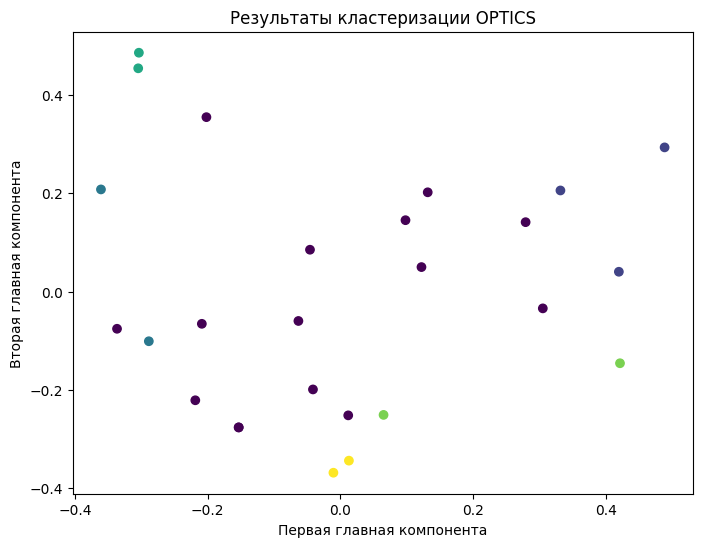

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_score, completeness_score

# Загрузка и подготовка данных
documents = [
    "The economy is improving in the last quarter.",
    "The president's speech about the economy was well-received.",
    "Economic growth is forecasted for the next year.",
    "The government is planning new economic reforms.",
    "New advancements in AI technology are impressive.",
    "AI technology is transforming the industry.",
    "Tech companies are investing in AI research.",
    "Innovations in AI continue to evolve rapidly.",
    "The central bank's interest rate decision affects the economy.",
    "Fiscal policies are essential for economic stability.",
    "Machine learning algorithms are getting more sophisticated.",
    "The rise of AI in healthcare is revolutionary.",
    "AI-powered automation is boosting productivity.",
    "New housing construction is booming in many regions.",
    "Consumer spending has increased in the past few months.",
    "The trade deficit with China remains a concern for the government.",
    "Inflation has been relatively low, which is good news for consumers.",
    "The automotive industry is seeing strong sales and production numbers.",
    "The tech sector has been the driving force behind economic growth.",
    "Oil prices have been volatile, impacting energy companies and consumers.",
    "The hospitality industry is recovering as travel restrictions are eased.",
    "The manufacturing sector showed signs of improvement in the latest report.",
    "The real estate market remains competitive with high demand and low supply.",
    "The Biden administration is proposing new economic policies and reforms.",
    "The global supply chain disruptions continue to impact various industries.",
    "The cryptocurrency market has seen significant fluctuations in recent months."
]

# Создание матрицы TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Применение алгоритма OPTICS
optics = OPTICS(min_samples=2, metric='cosine')
labels = optics.fit_predict(X.toarray())

# Вычисление метрик качества кластеризации
silhouette = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X.toarray(), labels)
davies_bouldin = davies_bouldin_score(X.toarray(), labels)
rand_index = adjusted_rand_score(labels, optics.labels_)
ari = adjusted_rand_score(labels, optics.labels_)
homogeneity = homogeneity_score(labels, optics.labels_)
completeness = completeness_score(labels, optics.labels_)

# Внутрикластерная дисперсия (WCSS)
wcss = 0
for i in range(max(labels) + 1):
    cluster_data = X[labels == i].toarray()
    wcss += np.sum((cluster_data - np.mean(cluster_data, axis=0)) ** 2)

# Межкластерная дисперсия (BCSS)
bcss = calinski_harabasz * wcss / (max(labels) + 1 - 1)

print(f'Silhouette Score: {silhouette:.3f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.3f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.3f}')
print(f'Rand Index: {rand_index:.3f}')
print(f'Adjusted Rand Index: {ari:.3f}')
print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'Within-Cluster Sum of Squares (WCSS): {wcss:.3f}')
print(f'Between-Cluster Sum of Squares (BCSS): {bcss:.3f}')

# Визуализация результатов кластеризации
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Результаты кластеризации OPTICS')
plt.show()

## Вопросы для закрепления темы

1. Что такое WCSS (внутрикластерная дисперсия) и как ее рассчитать?

2. Для чего нужна матрица сопряженности при оценке результатов кластеризации?

3. Как вычисляются гомогенность, полнота и индекс V-Measure? Что они показывают?

4. Что такое индекс Рэнда и скорректированный индекс Рэнда? Как они применяются при оценке кластеризации?

5. В чем разница между использованием WCSS и индекса Рэнда для оценки результатов кластеризации?

6. Как выбрать оптимальное число кластеров, если оно не задано заранее?

7. Какие особенности нужно учитывать при оценке кластеризации текстовых данных (по сравнению с другими типами данных)?

8. Как влияет ожидаемое и фактическое число кластеров на качество оценки результатов?

9. Приведите пример, когда гомогенность и полнота могут давать противоречивые результаты.

10. В каких случаях индекс Рэнда может давать более адекватную оценку, чем скорректированный индекс Рэнда?

11. Как интерпретировать значения WCSS, гомогенности, полноты и индексов Рэнда?

12. Какие дополнительные метрики можно использовать для оценки качества кластеризации текстовых данных?

13. Как учесть неравномерность распределения объектов по кластерам при оценке результатов?

14. Почему важно сравнивать результаты кластеризации с экспертной разметкой данных?

15. Приведите пример интерпретации матрицы сопряженности для текстовых данных.

16. Как можно использовать оценку качества кластеризации для выбора наиболее подходящего алгоритма?

17. Какие особенности нужно учитывать при кластеризации очень больших коллекций текстовых данных?

18. Как оценить устойчивость результатов кластеризации к изменению параметров алгоритма?

19. В каких ситуациях использование метрик кластеризации может быть недостаточным для оценки качества?

20. Приведите пример практического применения оценки качества кластеризации в реальной задаче обработки текстов.

21. Что такое силуэтный коэффициент и как его можно использовать для оценки качества кластеризации текстов?

22. Как можно применить метод эллокации для определения оптимального числа кластеров в текстовых данных?

23. Какие особенности нужно учитывать при использовании метрики Calinski-Harabasz для кластеризации документов?

24. Объясните, как можно применить метод «локтя» для выбора оптимального числа кластеров в текстовых данных.

25. Какие преимущества и ограничения имеет использование информационной меры энтропии для оценки качества кластеризации текстов?

26. Как можно применить метод DaviesBouldin Index для оценки кластеризации текстовых данных?

27. Что такое индекс Фаулкеса-Мэллоуза и как его можно использовать для оценки качества кластеризации документов?

28. Как можно использовать метрики когерентности и связности кластеров для анализа результатов кластеризации текстов?

29. Объясните, как можно применить метрику Хартигана для сравнения эффективности различных алгоритмов кластеризации текстовых данных.

30. Какие особенности необходимо учитывать при использовании меры F-меры для оценки качества кластеризации текстов?

## Задачи для самостоятельной работы

Хорошо, вот 20 примеров для самостоятельной работы по оценке эффективности алгоритмов кластеризации:

1. У вас есть набор данных с 100 точками, разбитых на 5 кластеров. Вычислите внутрикластерную дисперсию (WCSS) для этого разбиения.

2. Предположим, что у вас есть 3 кластера с центрами в точках (2, 4), (7, 9) и (12, 2). Рассчитайте WCSS, если точки в кластерах имеют следующие координаты:
   - Кластер 1: (1, 3), (2, 5), (3, 4), (3, 3)
   - Кластер 2: (6, 8), (7, 10), (8, 9)
   - Кластер 3: (11, 1), (12, 3), (13, 2)

3. Вы применили алгоритм к набору данных и получили следующие предсказанные кластеры: [1, 1, 2, 2, 3, 3, 3, 4, 4, 4]. Истинная кластеризация выглядит так: [1, 1, 1, 2, 2, 3, 3, 3, 4, 4]. Вычислите индекс Рэнда и скорректированный индекс Рэнда для этого результата.

4. Рассмотрим набор данных с 50 объектами, разбитых на 4 истинных класса. Алгоритм кластеризации разбил эти объекты на 3 кластера. Постройте матрицу сопряженности и вычислите гомогенность, полноту и индекс V-Measure.

5. Пусть у вас есть 8 объектов, разбитых на 2 истинных класса. Алгоритм кластеризации предсказал 3 кластера. Создайте матрицу сопряженности и рассчитайте гомогенность, полноту и V-Measure.

6-10. Аналогичные задачи, но с другими размерами наборов данных и числом классов/кластеров.

11-15. Выберите один из наборов данных из предыдущих примеров и протестируйте несколько алгоритмов кластеризации (например, K-means, DBSCAN, иерархическая кластеризация). Сравните полученные результаты с помощью WCSS, индекса Рэнда, гомогенности и полноты.

16-20. Придумайте свои собственные наборы данных для кластеризации и проанализируйте качество результатов с использованием рассмотренных метрик.



21. Кластеризация новостных статей:
   - Собрать набор новостных статей на разные темы
   - Разработать алгоритм кластеризации текста, основанный на NLP-методах
   - Сгруппировать статьи по общим темам (политика, экономика, спорт и т.д.)
   - Оценить качество кластеризации и предложить пути улучшения

22. Сегментация клиентских отзывов:
   - Получить набор текстовых отзывов клиентов о продукте/сервисе
   - Применить методы кластеризации текста для выявления общих тем в отзывах
   - Проанализировать полученные кластеры, чтобы определить ключевые проблемы и преимущества

23. Кластеризация научных публикаций:
   - Собрать корпус научных статей из различных предметных областей
   - Разработать алгоритм кластеризации текста, учитывающий специфику научных публикаций
   - Сгруппировать статьи по родственным областям исследований
   - Оценить точность кластеризации и предложить улучшения

24. Кластеризация сообщений в социальных медиа:
   - Получить набор сообщений из социальных сетей (твиты, посты)
   - Применить методы кластеризации для выявления общих тем обсуждения
   - Проанализировать полученные кластеры, чтобы определить популярные темы

25. Кластеризация корпоративных документов:
   - Собрать внутренние документы компании (отчеты, служебные записки)
   - Разработать алгоритм кластеризации текста, адаптированный для корпоративной среды
   - Сгруппировать документы по общим темам и тенденциям

26. Кластеризация медицинских записей:
   - Собрать набор медицинских отчетов и историй болезней
   - Применить методы кластеризации текста для выявления схожих симптомов или диагнозов
   - Проанализировать полученные кластеры, чтобы найти закономерности

27. Кластеризация описаний товаров:
   - Получить набор текстовых описаний товаров в интернет-магазине
   - Разработать алгоритм кластеризации, учитывающий специфику товарных описаний
   - Сгруппировать товары по схожим характеристикам и свойствам

28. Кластеризация текстов в системе электронного документооборота:
   - Собрать корпус внутренних документов организации
   - Применить методы кластеризации для систематизации документов
   - Проанализировать полученные кластеры, чтобы улучшить поиск и доступ к документам

29. Кластеризация текстов технической документации:
   - Получить набор технических руководств, инструкций, спецификаций
   - Разработать алгоритм кластеризации, адаптированный для технических текстов
   - Сгруппировать документы по общим темам и типам информации

30. Кластеризация пользовательских запросов:
    - Собрать набор текстовых запросов пользователей (например, в службу поддержки)
    - Применить методы кластеризации для выявления наиболее популярных типов запросов
    - Проанализировать полученные кластеры, чтобы улучшить обслуживание пользователей